In [65]:
from konlpy.tag import Okt
from tqdm import tqdm
import re
import pickle
import csv
import pandas as pd
from pandas import DataFrame 
import numpy as np
import warnings
from nltk.corpus import stopwords

warnings.filterwarnings(action='ignore')

In [66]:
title='zepeto.csv'
word_list =set(['이','앱','폰','개','저','요','제발','뭐','하나','그냥','해','데','못','때문','그것','게','지금','내','걸','나','위','로','캐','이안','고','처럼','밑','스','방금','제','다시','왜','안','갑자기','처음','전','줄','한번','오늘','아예','해도','원래','번','만','하라','때','그거','심해','가끔','피하','하나요','욤','튕기','뭘','약간','렉좀','인','옆','것','그','또','꼭','명','건','부분','자주','글','수가','분','곳','경우','바로','자꾸','용','여','터','오','튕겨','어쩌','더','수','조금','짱','음','등','해주시','함','등등','찍','일단','자기','생기','일리','후','뒤','이번','이후','가기','중이','오지','땜','응','장공','보고','너','듯','세','배','무엇','게속','안나','그레','전혀','다가','놀수','정말','별로','굿','벌','색','제패','토','새','쫌','염','것좀','강추','멩','정도','번','기','거의','살','달','좀','거','진짜','저기','밌','이나','주','안눌려','재','완전','최고','이건','임','애','막','슴','개도','주기도','여기','무','영','고요','니','영','아주','생각','생','맘','구','산','버','화가','혐기','주시','물','피','다른','리지','계속','무슨','잘못','뭔가','실망','욤','난','답','일이','자체','끼리','다음','습','계속','가요','보','최악','잠깐','이상','몇번','며칠','어디','가지','직접','눈','업','날','끝','뎅','하니','혹시','건가','네','요즘','도','를','이제','좋더','얼마','언제','대박','거기','된거','그대로','주심','예전','제대로','분명','시','제페토'])
word_list

{'가기',
 '가끔',
 '가요',
 '가지',
 '갑자기',
 '강추',
 '개',
 '개도',
 '거',
 '거기',
 '거의',
 '건',
 '건가',
 '걸',
 '것',
 '것좀',
 '게',
 '게속',
 '경우',
 '계속',
 '고',
 '고요',
 '곳',
 '구',
 '굿',
 '그',
 '그거',
 '그것',
 '그냥',
 '그대로',
 '그레',
 '글',
 '기',
 '꼭',
 '끝',
 '끼리',
 '나',
 '난',
 '날',
 '내',
 '너',
 '네',
 '놀수',
 '눈',
 '니',
 '다가',
 '다른',
 '다시',
 '다음',
 '달',
 '답',
 '대박',
 '더',
 '데',
 '뎅',
 '도',
 '된거',
 '뒤',
 '듯',
 '등',
 '등등',
 '때',
 '때문',
 '땜',
 '또',
 '렉좀',
 '로',
 '를',
 '리지',
 '막',
 '만',
 '맘',
 '멩',
 '며칠',
 '명',
 '몇번',
 '못',
 '무',
 '무슨',
 '무엇',
 '물',
 '뭐',
 '뭔가',
 '뭘',
 '밌',
 '밑',
 '바로',
 '방금',
 '배',
 '버',
 '번',
 '벌',
 '별로',
 '보',
 '보고',
 '부분',
 '분',
 '분명',
 '산',
 '살',
 '새',
 '색',
 '생',
 '생각',
 '생기',
 '세',
 '수',
 '수가',
 '스',
 '슴',
 '습',
 '시',
 '실망',
 '심해',
 '아예',
 '아주',
 '안',
 '안나',
 '안눌려',
 '애',
 '앱',
 '약간',
 '어디',
 '어쩌',
 '언제',
 '얼마',
 '업',
 '여',
 '여기',
 '염',
 '영',
 '옆',
 '예전',
 '오',
 '오늘',
 '오지',
 '완전',
 '왜',
 '요',
 '요즘',
 '욤',
 '용',
 '원래',
 '위',
 '음',
 '응',
 '이',
 '이건',
 '이나',
 '이번',
 '이상',
 '이안',
 '이제',
 '이후',
 '

In [67]:
def clean_text(text):
    text = text.replace(".", "").strip()
    text = text.replace("·", " ").strip()
    pattern = '[^ ㄱ-ㅣ가-힣|0-9]+'
    text = re.sub(pattern=pattern, repl='', string=text)
    return text

def remove_values_from_list(the_list, val):
    return [value for value in the_list if value != val]

In [68]:
def get_nouns(tokenizer, sentence):
    nouns=tokenizer.nouns(sentence)
    for word in word_list: 
        nouns=remove_values_from_list(nouns,word)
    return nouns

def tokenize(df):
    tokenizer = Okt()
    processed_data = [] 
    for sent in tqdm(df['content']):
        sentence = clean_text(str(sent).replace("\n", "").strip())
        processed_data.append(get_nouns(tokenizer, sentence))
    return processed_data

In [69]:
def save_processed_data(processed_data):
    with open("output/tokenized_data_"+title, 'w', newline="", encoding='utf-8') as f:
        writer = csv.writer(f)
        for data in processed_data:
            writer.writerow(data)
            
if __name__ == '__main__':
    tdf = pd.read_csv("data/zepeto.csv")
    df=tdf[['userName','at','content','score','thumbsUpCount']]
    df.dropna(subset = ['content'])
    processed_data = tokenize(df)
    save_processed_data(processed_data)

100%|███████████████████████████████████████████████████████████████████████████| 52550/52550 [02:48<00:00, 312.19it/s]


In [70]:
processed_data = [sent.strip().split(",") for sent in tqdm(open("output/tokenized_data_"+title,'r',encoding='utf-8').readlines())]
processed_data = DataFrame(processed_data)
processed_data[0] = processed_data[0].replace("", np.nan)
processed_data = processed_data[processed_data[0].notnull()]
processed_data = processed_data.values.tolist()
processed_data2=[]
for i in processed_data:
    i = list(filter(None, i))
    processed_data2.append(i)
processed_data = processed_data2
processed_data

100%|███████████████████████████████████████████████████████████████████████| 52550/52550 [00:00<00:00, 1545234.30it/s]


[['사용성', '개선', '오히려', '월드', '기능', '마비', '사용성', '호환', '문제'],
 ['퀘스트',
  '스크래치',
  '광고',
  '퀘스트',
  '카드',
  '완료',
  '방치',
  '일',
  '광고',
  '콜라보',
  '정신',
  '유저',
  '속눈썹',
  '착용',
  '모자',
  '파트',
  '모자',
  '머리핀',
  '해결',
  '중복',
  '착용',
  '앞머리',
  '착용',
  '붙임머리',
  '포니테일',
  '선택',
  '붙임머리',
  '앞머리',
  '선택',
  '문제',
  '아래',
  '문제',
  '은',
  '중복',
  '착용',
  '허용',
  '해결'],
 ['체제', '읍'],
 ['캐릭터',
  '소통',
  '단점',
  '첫',
  '자신',
  '캐릭터',
  '사진',
  '있었르',
  '현질',
  '면서',
  '캐릭터',
  '추가',
  '이유',
  '남',
  '캐릭터',
  '사진',
  '젬',
  '꽤',
  '레벨',
  '플레이',
  '젬',
  '기분',
  '나머지'],
 ['케릭', '키', '조절', '예', '식', '얼굴', '몸', '팔다리', '신체', '조절'],
 ['스크래치', '기분', '중단', '젠', '접속', '피해', '피해', '신고', '접지', '최대한', '점', '별', '별'],
 ['게임'],
 ['업데이트',
  '업데이트',
  '월드',
  '방',
  '검색',
  '기능',
  '방',
  '검색',
  '기능',
  '월드',
  '갈수',
  '그게',
  '재미'],
 ['퍼즐', '스파이', '미션', '잼'],
 ['아유'],
 ['아이', '세면', '요별'],
 ['동영상', '게시', '동영상', '동영상', '업로드', '동영상', '길이'],
 ['마디',
  '코인',
  '출석',
  '젬',
  '노가다',
  '현질',
  '단점',
  '아이템',
 

In [71]:
from gensim.models.ldamodel import LdaModel
from gensim.models.callbacks import CoherenceMetric
from gensim import corpora
from gensim.models.callbacks import PerplexityMetric

import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [72]:
dictionary = corpora.Dictionary(processed_data)
dictionary.filter_extremes(no_below=2, no_above=0.5)

2022-08-29 17:27:22,358 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2022-08-29 17:27:22,427 : INFO : adding document #10000 to Dictionary(7294 unique tokens: ['개선', '기능', '마비', '문제', '사용성']...)
2022-08-29 17:27:22,491 : INFO : adding document #20000 to Dictionary(10992 unique tokens: ['개선', '기능', '마비', '문제', '사용성']...)
2022-08-29 17:27:22,542 : INFO : adding document #30000 to Dictionary(13375 unique tokens: ['개선', '기능', '마비', '문제', '사용성']...)
2022-08-29 17:27:22,593 : INFO : adding document #40000 to Dictionary(15435 unique tokens: ['개선', '기능', '마비', '문제', '사용성']...)
2022-08-29 17:27:22,614 : INFO : built Dictionary(15983 unique tokens: ['개선', '기능', '마비', '문제', '사용성']...) from 43925 documents (total 280551 corpus positions)
2022-08-29 17:27:22,614 : INFO : Dictionary lifecycle event {'msg': "built Dictionary(15983 unique tokens: ['개선', '기능', '마비', '문제', '사용성']...) from 43925 documents (total 280551 corpus positions)", 'datetime': '2022-08-29T17:27:22.614153', 'gensi

In [73]:
corpus = [dictionary.doc2bow(text) for text in processed_data]

2022-08-29 20:21:37,309 : INFO : using symmetric alpha at 0.5
2022-08-29 20:21:37,309 : INFO : using symmetric eta at 0.5
2022-08-29 20:21:37,310 : INFO : using serial LDA version on this node
2022-08-29 20:21:37,311 : INFO : running online (single-pass) LDA training, 2 topics, 1 passes over the supplied corpus of 43925 documents, updating model once every 2000 documents, evaluating perplexity every 20000 documents, iterating 50x with a convergence threshold of 0.001000
2022-08-29 20:21:37,312 : INFO : PROGRESS: pass 0, at document #2000/43925


Number of unique tokens: 7055
Number of documents: 43925


2022-08-29 20:21:37,903 : INFO : merging changes from 2000 documents into a model of 43925 documents
2022-08-29 20:21:37,904 : INFO : topic #0 (0.500): 0.055*"젬" + 0.033*"게임" + 0.022*"삭제" + 0.021*"현질" + 0.016*"월드" + 0.014*"게시" + 0.014*"캐릭터" + 0.014*"점" + 0.013*"옷" + 0.012*"유저"
2022-08-29 20:21:37,904 : INFO : topic #1 (0.500): 0.040*"젬" + 0.023*"게시" + 0.019*"삭제" + 0.019*"옷" + 0.018*"사람" + 0.018*"게임" + 0.017*"선물" + 0.015*"유저" + 0.014*"아이템" + 0.014*"현질"
2022-08-29 20:21:37,904 : INFO : topic diff=3.509959, rho=1.000000
2022-08-29 20:21:37,905 : INFO : PROGRESS: pass 0, at document #4000/43925
2022-08-29 20:21:38,324 : INFO : merging changes from 2000 documents into a model of 43925 documents
2022-08-29 20:21:38,325 : INFO : topic #0 (0.500): 0.053*"젬" + 0.042*"게임" + 0.025*"광고" + 0.021*"월드" + 0.021*"현질" + 0.017*"캐릭터" + 0.016*"점" + 0.015*"렉" + 0.013*"오류" + 0.012*"옷"
2022-08-29 20:21:38,325 : INFO : topic #1 (0.500): 0.040*"젬" + 0.023*"옷" + 0.019*"선물" + 0.018*"사람" + 0.016*"게임" + 0.016*"코인" 

2022-08-29 20:21:41,402 : INFO : topic diff=0.269637, rho=0.267261
2022-08-29 20:21:41,403 : INFO : PROGRESS: pass 0, at document #30000/43925
2022-08-29 20:21:41,559 : INFO : merging changes from 2000 documents into a model of 43925 documents
2022-08-29 20:21:41,561 : INFO : topic #0 (0.500): 0.050*"게임" + 0.038*"렉" + 0.033*"월드" + 0.030*"업데이트" + 0.025*"캐릭터" + 0.022*"젬" + 0.022*"광고" + 0.014*"점" + 0.011*"코인" + 0.011*"친구"
2022-08-29 20:21:41,561 : INFO : topic #1 (0.500): 0.076*"틱톡" + 0.029*"사람" + 0.029*"옷" + 0.029*"젬" + 0.016*"유저" + 0.016*"계정" + 0.015*"선물" + 0.014*"코인" + 0.013*"점령" + 0.013*"현질"
2022-08-29 20:21:41,561 : INFO : topic diff=0.286978, rho=0.258199
2022-08-29 20:21:41,562 : INFO : PROGRESS: pass 0, at document #32000/43925
2022-08-29 20:21:41,713 : INFO : merging changes from 2000 documents into a model of 43925 documents
2022-08-29 20:21:41,714 : INFO : topic #0 (0.500): 0.048*"게임" + 0.037*"렉" + 0.034*"월드" + 0.030*"업데이트" + 0.027*"캐릭터" + 0.020*"광고" + 0.018*"젬" + 0.013*"점" + 0

2022-08-29 20:22:14,351 : INFO : topic #0 (0.333): 0.037*"젬" + 0.024*"선물" + 0.023*"유저" + 0.021*"아이템" + 0.020*"월드" + 0.018*"게임" + 0.017*"사람" + 0.017*"옷" + 0.015*"잼" + 0.015*"코인"
2022-08-29 20:22:14,352 : INFO : topic #1 (0.333): 0.035*"렉" + 0.026*"옷" + 0.025*"캐릭터" + 0.022*"계정" + 0.021*"게임" + 0.019*"오류" + 0.016*"젬" + 0.016*"삭제" + 0.013*"로그인" + 0.012*"게시"
2022-08-29 20:22:14,352 : INFO : topic #2 (0.333): 0.079*"젬" + 0.051*"게임" + 0.039*"현질" + 0.039*"광고" + 0.022*"점" + 0.021*"코인" + 0.015*"유도" + 0.012*"돈" + 0.010*"옷" + 0.010*"사람"
2022-08-29 20:22:14,352 : INFO : topic diff=0.608785, rho=0.577350
2022-08-29 20:22:14,353 : INFO : PROGRESS: pass 0, at document #8000/43925
2022-08-29 20:22:14,671 : INFO : merging changes from 2000 documents into a model of 43925 documents
2022-08-29 20:22:14,672 : INFO : topic #0 (0.333): 0.035*"젬" + 0.025*"선물" + 0.023*"유저" + 0.023*"옷" + 0.020*"아이템" + 0.018*"게임" + 0.018*"월드" + 0.017*"잼" + 0.015*"사람" + 0.015*"코인"
2022-08-29 20:22:14,673 : INFO : topic #1 (0.333):

2022-08-29 20:22:17,247 : INFO : topic #2 (0.333): 0.100*"젬" + 0.056*"게임" + 0.044*"현질" + 0.032*"코인" + 0.024*"광고" + 0.020*"옷" + 0.019*"점" + 0.018*"돈" + 0.014*"유도" + 0.014*"재미"
2022-08-29 20:22:17,247 : INFO : topic diff=0.307618, rho=0.277350
2022-08-29 20:22:17,247 : INFO : PROGRESS: pass 0, at document #28000/43925
2022-08-29 20:22:17,431 : INFO : merging changes from 2000 documents into a model of 43925 documents
2022-08-29 20:22:17,433 : INFO : topic #0 (0.333): 0.041*"월드" + 0.033*"옷" + 0.031*"업데이트" + 0.021*"선물" + 0.017*"유저" + 0.017*"기능" + 0.017*"사람" + 0.016*"잼" + 0.016*"친구" + 0.015*"랙"
2022-08-29 20:22:17,433 : INFO : topic #1 (0.333): 0.100*"틱톡" + 0.042*"렉" + 0.026*"사람" + 0.024*"점령" + 0.020*"계정" + 0.017*"별" + 0.016*"게임" + 0.016*"욕" + 0.014*"캐릭터" + 0.014*"로그인"
2022-08-29 20:22:17,434 : INFO : topic #2 (0.333): 0.092*"젬" + 0.054*"게임" + 0.041*"현질" + 0.034*"코인" + 0.030*"광고" + 0.021*"돈" + 0.020*"옷" + 0.017*"점" + 0.015*"재미" + 0.013*"유도"
2022-08-29 20:22:17,434 : INFO : topic diff=0.2661

2022-08-29 20:22:49,235 : INFO : -6.996 per-word bound, 127.6 perplexity estimate based on a held-out corpus of 43925 documents with 271360 words
2022-08-29 20:22:49,235 : INFO : using symmetric alpha at 0.25
2022-08-29 20:22:49,236 : INFO : using symmetric eta at 0.25
2022-08-29 20:22:49,236 : INFO : using serial LDA version on this node
2022-08-29 20:22:49,239 : INFO : running online (single-pass) LDA training, 4 topics, 1 passes over the supplied corpus of 43925 documents, updating model once every 2000 documents, evaluating perplexity every 20000 documents, iterating 50x with a convergence threshold of 0.001000
2022-08-29 20:22:49,239 : INFO : PROGRESS: pass 0, at document #2000/43925
2022-08-29 20:22:49,644 : INFO : merging changes from 2000 documents into a model of 43925 documents
2022-08-29 20:22:49,646 : INFO : topic #0 (0.250): 0.030*"젬" + 0.018*"유저" + 0.017*"친구" + 0.017*"업데이트" + 0.016*"월드" + 0.016*"점" + 0.016*"아이템" + 0.014*"옷" + 0.013*"선물" + 0.013*"사람"
2022-08-29 20:22:49,64

2022-08-29 20:22:51,386 : INFO : PROGRESS: pass 0, at document #18000/43925
2022-08-29 20:22:51,582 : INFO : merging changes from 2000 documents into a model of 43925 documents
2022-08-29 20:22:51,583 : INFO : topic #0 (0.250): 0.024*"옷" + 0.023*"업데이트" + 0.023*"월드" + 0.021*"랙" + 0.019*"친구" + 0.016*"맵" + 0.016*"별" + 0.015*"기능" + 0.015*"선물" + 0.015*"캐릭터"
2022-08-29 20:22:51,584 : INFO : topic #1 (0.250): 0.146*"젬" + 0.057*"현질" + 0.045*"코인" + 0.045*"옷" + 0.022*"잼" + 0.020*"유도" + 0.019*"광고" + 0.018*"돈" + 0.017*"게임" + 0.013*"아이템"
2022-08-29 20:22:51,584 : INFO : topic #2 (0.250): 0.084*"게임" + 0.051*"틱톡" + 0.042*"렉" + 0.027*"사람" + 0.022*"캐릭터" + 0.021*"점령" + 0.018*"옷" + 0.018*"점" + 0.016*"월드" + 0.015*"유저"
2022-08-29 20:22:51,585 : INFO : topic #3 (0.250): 0.035*"로그인" + 0.031*"계정" + 0.023*"사람" + 0.018*"오류" + 0.016*"삭제" + 0.014*"게시" + 0.013*"렉" + 0.013*"유저" + 0.011*"인증" + 0.010*"영상"
2022-08-29 20:22:51,585 : INFO : topic diff=0.393277, rho=0.333333
2022-08-29 20:22:51,839 : INFO : -6.862 per-wo

2022-08-29 20:22:53,186 : INFO : topic #2 (0.250): 0.114*"틱톡" + 0.072*"게임" + 0.047*"렉" + 0.030*"사람" + 0.017*"재미" + 0.016*"캐릭터" + 0.015*"점령" + 0.015*"유저" + 0.014*"욕" + 0.013*"추천"
2022-08-29 20:22:53,187 : INFO : topic #3 (0.250): 0.046*"계정" + 0.023*"로그인" + 0.022*"오류" + 0.018*"삭제" + 0.017*"업뎃" + 0.014*"렉" + 0.014*"사람" + 0.013*"게시" + 0.012*"이메일" + 0.009*"비밀번호"
2022-08-29 20:22:53,187 : INFO : topic diff=0.315671, rho=0.242536
2022-08-29 20:22:53,187 : INFO : PROGRESS: pass 0, at document #36000/43925
2022-08-29 20:22:53,336 : INFO : merging changes from 2000 documents into a model of 43925 documents
2022-08-29 20:22:53,338 : INFO : topic #0 (0.250): 0.058*"업데이트" + 0.040*"월드" + 0.039*"캐릭터" + 0.028*"옷" + 0.023*"기능" + 0.021*"친구" + 0.017*"추가" + 0.017*"랙" + 0.016*"렉" + 0.014*"선물"
2022-08-29 20:22:53,339 : INFO : topic #1 (0.250): 0.061*"옷" + 0.060*"코인" + 0.060*"젬" + 0.047*"돈" + 0.038*"광고" + 0.032*"현질" + 0.019*"잼" + 0.016*"퀘스트" + 0.015*"게임" + 0.013*"당첨"
2022-08-29 20:22:53,339 : INFO : topic #2

2022-08-29 20:23:24,282 : INFO : topic #1 (0.200): 0.053*"젬" + 0.032*"캐릭터" + 0.029*"게임" + 0.016*"추천" + 0.015*"사람" + 0.014*"재미" + 0.014*"유저" + 0.014*"업데이트" + 0.012*"삭제" + 0.011*"게시"
2022-08-29 20:23:24,282 : INFO : topic #2 (0.200): 0.057*"젬" + 0.056*"게임" + 0.031*"현질" + 0.028*"코인" + 0.019*"잼" + 0.016*"렉" + 0.015*"점" + 0.015*"계정" + 0.015*"선물" + 0.014*"퀘스트"
2022-08-29 20:23:24,282 : INFO : topic #3 (0.200): 0.043*"광고" + 0.031*"게임" + 0.024*"아이템" + 0.023*"삭제" + 0.019*"렉" + 0.017*"유저" + 0.017*"게시" + 0.017*"점" + 0.015*"오류" + 0.014*"옷"
2022-08-29 20:23:24,283 : INFO : topic #4 (0.200): 0.043*"월드" + 0.038*"현질" + 0.037*"옷" + 0.028*"렉" + 0.023*"게임" + 0.022*"유저" + 0.020*"사람" + 0.017*"젬" + 0.015*"점" + 0.014*"돈"
2022-08-29 20:23:24,283 : INFO : topic diff=0.678457, rho=0.707107
2022-08-29 20:23:24,284 : INFO : PROGRESS: pass 0, at document #6000/43925
2022-08-29 20:23:24,548 : INFO : merging changes from 2000 documents into a model of 43925 documents
2022-08-29 20:23:24,549 : INFO : topic #0 (0.200)

2022-08-29 20:23:25,996 : INFO : topic #3 (0.200): 0.026*"게임" + 0.025*"로그인" + 0.023*"광고" + 0.017*"렉" + 0.015*"게시" + 0.015*"랙" + 0.014*"버그" + 0.014*"유저" + 0.014*"점" + 0.011*"캐릭터"
2022-08-29 20:23:25,996 : INFO : topic #4 (0.200): 0.061*"렉" + 0.043*"옷" + 0.041*"현질" + 0.035*"월드" + 0.026*"사람" + 0.025*"게임" + 0.021*"점" + 0.019*"유도" + 0.018*"유저" + 0.018*"돈"
2022-08-29 20:23:25,997 : INFO : topic diff=0.372316, rho=0.333333
2022-08-29 20:23:26,265 : INFO : -6.961 per-word bound, 124.6 perplexity estimate based on a held-out corpus of 2000 documents with 12997 words
2022-08-29 20:23:26,265 : INFO : PROGRESS: pass 0, at document #20000/43925
2022-08-29 20:23:26,468 : INFO : merging changes from 2000 documents into a model of 43925 documents
2022-08-29 20:23:26,470 : INFO : topic #0 (0.200): 0.150*"젬" + 0.053*"옷" + 0.040*"코인" + 0.023*"현질" + 0.019*"선물" + 0.016*"아이템" + 0.015*"가격" + 0.014*"점" + 0.013*"유저" + 0.012*"게임"
2022-08-29 20:23:26,470 : INFO : topic #1 (0.200): 0.132*"틱톡" + 0.054*"점령" + 0.036

2022-08-29 20:23:27,484 : INFO : topic #4 (0.200): 0.074*"렉" + 0.066*"월드" + 0.026*"옷" + 0.022*"돈" + 0.021*"게임" + 0.020*"사람" + 0.018*"현질" + 0.018*"친구" + 0.017*"별" + 0.015*"점"
2022-08-29 20:23:27,484 : INFO : topic diff=0.230160, rho=0.250000
2022-08-29 20:23:27,485 : INFO : PROGRESS: pass 0, at document #34000/43925
2022-08-29 20:23:27,650 : INFO : merging changes from 2000 documents into a model of 43925 documents
2022-08-29 20:23:27,653 : INFO : topic #0 (0.200): 0.078*"옷" + 0.073*"젬" + 0.050*"코인" + 0.035*"선물" + 0.016*"현질" + 0.015*"돈" + 0.015*"기능" + 0.015*"아이템" + 0.015*"광고" + 0.014*"가격"
2022-08-29 20:23:27,653 : INFO : topic #1 (0.200): 0.155*"틱톡" + 0.055*"업데이트" + 0.035*"사람" + 0.028*"캐릭터" + 0.023*"게임" + 0.023*"재미" + 0.021*"점령" + 0.018*"추천" + 0.016*"영상" + 0.015*"욕"
2022-08-29 20:23:27,654 : INFO : topic #2 (0.200): 0.066*"게임" + 0.061*"계정" + 0.036*"잼" + 0.020*"로그인" + 0.015*"현질" + 0.015*"코인" + 0.014*"이메일" + 0.014*"비밀번호" + 0.012*"가입" + 0.011*"돈"
2022-08-29 20:23:27,654 : INFO : topic #3 (

2022-08-29 20:23:58,957 : INFO : using symmetric alpha at 0.16666666666666666
2022-08-29 20:23:58,957 : INFO : using symmetric eta at 0.16666666666666666
2022-08-29 20:23:58,958 : INFO : using serial LDA version on this node
2022-08-29 20:23:58,961 : INFO : running online (single-pass) LDA training, 6 topics, 1 passes over the supplied corpus of 43925 documents, updating model once every 2000 documents, evaluating perplexity every 20000 documents, iterating 50x with a convergence threshold of 0.001000
2022-08-29 20:23:58,962 : INFO : PROGRESS: pass 0, at document #2000/43925
2022-08-29 20:23:59,332 : INFO : merging changes from 2000 documents into a model of 43925 documents
2022-08-29 20:23:59,334 : INFO : topic #1 (0.167): 0.044*"젬" + 0.024*"게시" + 0.022*"게임" + 0.020*"잼" + 0.019*"현질" + 0.017*"사람" + 0.015*"기능" + 0.012*"아이템" + 0.012*"재미" + 0.012*"캐릭터"
2022-08-29 20:23:59,334 : INFO : topic #2 (0.167): 0.082*"젬" + 0.027*"현질" + 0.023*"게임" + 0.021*"코인" + 0.019*"유저" + 0.018*"삭제" + 0.015*"월드"

2022-08-29 20:24:00,822 : INFO : topic diff=0.376275, rho=0.377964
2022-08-29 20:24:00,822 : INFO : PROGRESS: pass 0, at document #16000/43925
2022-08-29 20:24:01,054 : INFO : merging changes from 2000 documents into a model of 43925 documents
2022-08-29 20:24:01,057 : INFO : topic #5 (0.167): 0.069*"옷" + 0.049*"캐릭터" + 0.036*"게임" + 0.033*"돈" + 0.026*"현질" + 0.024*"광고" + 0.021*"추천" + 0.019*"겜" + 0.018*"점" + 0.015*"인증"
2022-08-29 20:24:01,057 : INFO : topic #4 (0.167): 0.061*"렉" + 0.055*"게임" + 0.032*"사람" + 0.030*"점" + 0.028*"업데이트" + 0.023*"틱톡" + 0.021*"별" + 0.019*"유저" + 0.017*"점령" + 0.017*"오류"
2022-08-29 20:24:01,057 : INFO : topic #2 (0.167): 0.146*"젬" + 0.064*"현질" + 0.037*"코인" + 0.032*"옷" + 0.028*"유도" + 0.027*"게임" + 0.021*"유저" + 0.015*"아이템" + 0.013*"가격" + 0.012*"사람"
2022-08-29 20:24:01,058 : INFO : topic #1 (0.167): 0.058*"잼" + 0.045*"틱톡" + 0.034*"게임" + 0.030*"재미" + 0.022*"랙" + 0.020*"젬" + 0.017*"기능" + 0.016*"친구" + 0.016*"미션" + 0.014*"보석"
2022-08-29 20:24:01,058 : INFO : topic #0 (0.167

2022-08-29 20:24:02,629 : INFO : merging changes from 2000 documents into a model of 43925 documents
2022-08-29 20:24:02,631 : INFO : topic #2 (0.167): 0.118*"젬" + 0.054*"코인" + 0.044*"현질" + 0.030*"옷" + 0.025*"광고" + 0.021*"게임" + 0.015*"선물" + 0.015*"아이템" + 0.014*"유도" + 0.013*"유저"
2022-08-29 20:24:02,631 : INFO : topic #0 (0.167): 0.061*"월드" + 0.034*"선물" + 0.024*"맵" + 0.023*"렉" + 0.018*"저장" + 0.015*"옷" + 0.014*"게임" + 0.013*"얼굴" + 0.013*"노잼" + 0.013*"사람"
2022-08-29 20:24:02,632 : INFO : topic #1 (0.167): 0.167*"틱톡" + 0.043*"잼" + 0.041*"재미" + 0.031*"랙" + 0.028*"게임" + 0.019*"친구" + 0.016*"기능" + 0.014*"말" + 0.011*"사람" + 0.010*"추가"
2022-08-29 20:24:02,632 : INFO : topic #4 (0.167): 0.081*"틱톡" + 0.060*"업데이트" + 0.056*"렉" + 0.044*"사람" + 0.041*"게임" + 0.028*"점령" + 0.023*"유저" + 0.019*"영상" + 0.019*"월드" + 0.018*"별"
2022-08-29 20:24:02,633 : INFO : topic #3 (0.167): 0.071*"계정" + 0.040*"로그인" + 0.020*"삭제" + 0.016*"게임" + 0.013*"이메일" + 0.013*"비밀번호" + 0.012*"가입" + 0.011*"로그아웃" + 0.009*"어플" + 0.008*"시간"
2022-

2022-08-29 20:24:04,224 : INFO : merging changes from 1925 documents into a model of 43925 documents
2022-08-29 20:24:04,226 : INFO : topic #2 (0.167): 0.099*"코인" + 0.074*"퀘스트" + 0.040*"옷" + 0.027*"광고" + 0.026*"게임" + 0.025*"젬" + 0.021*"옷장" + 0.019*"현질" + 0.017*"아이템" + 0.011*"선물"
2022-08-29 20:24:04,227 : INFO : topic #3 (0.167): 0.069*"계정" + 0.058*"로그인" + 0.032*"초기" + 0.028*"이메일" + 0.028*"박스" + 0.027*"삭제" + 0.020*"로그아웃" + 0.018*"가입" + 0.015*"게임" + 0.013*"비밀번호"
2022-08-29 20:24:04,227 : INFO : topic #4 (0.167): 0.088*"렉" + 0.052*"업데이트" + 0.048*"게임" + 0.030*"사람" + 0.023*"오류" + 0.023*"틱톡" + 0.017*"점" + 0.015*"인사" + 0.014*"유저" + 0.013*"설치"
2022-08-29 20:24:04,227 : INFO : topic #1 (0.167): 0.050*"틱톡" + 0.032*"재미" + 0.031*"친구" + 0.030*"랙" + 0.029*"추가" + 0.026*"게임" + 0.020*"잼" + 0.020*"기능" + 0.013*"서버" + 0.012*"만들기"
2022-08-29 20:24:04,228 : INFO : topic #0 (0.167): 0.041*"사진" + 0.040*"로딩" + 0.036*"얼굴" + 0.030*"화면" + 0.020*"추가" + 0.019*"월드" + 0.019*"선물" + 0.018*"렉" + 0.018*"저장" + 0.018*"기능"


2022-08-29 20:24:35,154 : INFO : topic #3 (0.143): 0.062*"로그인" + 0.035*"틱톡" + 0.033*"맵" + 0.029*"계정" + 0.025*"옷" + 0.024*"게임" + 0.021*"인증" + 0.019*"보석" + 0.018*"돈" + 0.018*"번호"
2022-08-29 20:24:35,154 : INFO : topic #4 (0.143): 0.054*"옷" + 0.045*"현질" + 0.030*"유저" + 0.026*"유도" + 0.024*"단점" + 0.023*"게임" + 0.023*"사람" + 0.022*"젬" + 0.019*"점" + 0.017*"계정"
2022-08-29 20:24:35,155 : INFO : topic #2 (0.143): 0.037*"점프" + 0.036*"캐릭터" + 0.036*"광고" + 0.025*"코인" + 0.024*"기능" + 0.022*"랙" + 0.022*"업뎃" + 0.018*"별" + 0.016*"마스터" + 0.015*"화면"
2022-08-29 20:24:35,155 : INFO : topic #6 (0.143): 0.077*"렉" + 0.047*"잼" + 0.041*"게임" + 0.024*"친구" + 0.020*"캐릭터" + 0.019*"욕" + 0.017*"사람" + 0.014*"가입" + 0.013*"점" + 0.013*"월드"
2022-08-29 20:24:35,156 : INFO : topic #0 (0.143): 0.027*"업데이트" + 0.026*"젬" + 0.025*"옷" + 0.024*"사람" + 0.023*"선물" + 0.023*"점" + 0.019*"현질" + 0.017*"아이템" + 0.013*"오류" + 0.013*"월드"
2022-08-29 20:24:35,156 : INFO : topic diff=0.365423, rho=0.408248
2022-08-29 20:24:35,156 : INFO : PROGRESS: pas

2022-08-29 20:24:36,673 : INFO : topic #6 (0.143): 0.113*"렉" + 0.037*"잼" + 0.036*"월드" + 0.027*"친구" + 0.027*"욕" + 0.026*"사람" + 0.026*"게임" + 0.015*"캐릭터" + 0.013*"가입" + 0.011*"점"
2022-08-29 20:24:36,673 : INFO : topic #3 (0.143): 0.214*"틱톡" + 0.061*"점령" + 0.034*"로그인" + 0.029*"계정" + 0.020*"영상" + 0.017*"사람" + 0.014*"맵" + 0.014*"꿀잼" + 0.014*"유저" + 0.012*"별"
2022-08-29 20:24:36,674 : INFO : topic #5 (0.143): 0.130*"게임" + 0.024*"추천" + 0.024*"월드" + 0.019*"별" + 0.018*"말" + 0.018*"버그" + 0.016*"사람" + 0.015*"유저" + 0.014*"설치" + 0.013*"점"
2022-08-29 20:24:36,674 : INFO : topic #0 (0.143): 0.077*"업데이트" + 0.028*"선물" + 0.024*"옷" + 0.023*"사람" + 0.021*"기능" + 0.020*"월드" + 0.014*"유저" + 0.013*"점" + 0.011*"오류" + 0.011*"취"
2022-08-29 20:24:36,674 : INFO : topic diff=0.239435, rho=0.277350
2022-08-29 20:24:36,675 : INFO : PROGRESS: pass 0, at document #28000/43925
2022-08-29 20:24:36,837 : INFO : merging changes from 2000 documents into a model of 43925 documents
2022-08-29 20:24:36,840 : INFO : topic #5 (0.143

2022-08-29 20:24:37,943 : INFO : topic #4 (0.143): 0.071*"옷" + 0.034*"인사" + 0.028*"박스" + 0.018*"복구" + 0.018*"사람" + 0.015*"점" + 0.014*"유저" + 0.013*"현질" + 0.012*"게임" + 0.011*"미니게임"
2022-08-29 20:24:37,943 : INFO : topic #3 (0.143): 0.109*"틱톡" + 0.093*"계정" + 0.070*"로그인" + 0.035*"이메일" + 0.025*"로그아웃" + 0.020*"꿀잼" + 0.016*"영상" + 0.015*"비밀번호" + 0.015*"점령" + 0.013*"삭제"
2022-08-29 20:24:37,944 : INFO : topic #6 (0.143): 0.107*"렉" + 0.040*"친구" + 0.034*"사진" + 0.027*"월드" + 0.020*"잼" + 0.019*"가입" + 0.017*"캐릭터" + 0.017*"게임" + 0.015*"사람" + 0.014*"이름"
2022-08-29 20:24:37,944 : INFO : topic diff=0.180627, rho=0.223607
2022-08-29 20:24:37,945 : INFO : PROGRESS: pass 0, at document #42000/43925
2022-08-29 20:24:38,095 : INFO : merging changes from 2000 documents into a model of 43925 documents
2022-08-29 20:24:38,097 : INFO : topic #1 (0.143): 0.128*"코인" + 0.091*"퀘스트" + 0.075*"돈" + 0.051*"옷" + 0.043*"젬" + 0.026*"광고" + 0.024*"현질" + 0.020*"재미" + 0.017*"게임" + 0.015*"스크래치"
2022-08-29 20:24:38,097 : INFO : to

2022-08-29 20:25:09,265 : INFO : topic #1 (0.125): 0.038*"사람" + 0.031*"캐릭터" + 0.027*"젬" + 0.024*"점" + 0.023*"게임" + 0.020*"버그" + 0.016*"유저" + 0.016*"렉" + 0.015*"월드" + 0.014*"신고"
2022-08-29 20:25:09,265 : INFO : topic #6 (0.125): 0.049*"게임" + 0.036*"삭제" + 0.020*"게시" + 0.017*"캐릭터" + 0.016*"광고" + 0.014*"아이템" + 0.013*"친구" + 0.012*"기능" + 0.011*"유저" + 0.011*"문제"
2022-08-29 20:25:09,265 : INFO : topic #2 (0.125): 0.135*"젬" + 0.059*"현질" + 0.038*"광고" + 0.035*"옷" + 0.029*"게임" + 0.026*"유도" + 0.024*"코인" + 0.020*"유저" + 0.014*"돈" + 0.012*"점"
2022-08-29 20:25:09,266 : INFO : topic diff=0.410363, rho=0.500000
2022-08-29 20:25:09,266 : INFO : PROGRESS: pass 0, at document #10000/43925
2022-08-29 20:25:09,491 : INFO : merging changes from 2000 documents into a model of 43925 documents
2022-08-29 20:25:09,493 : INFO : topic #7 (0.125): 0.050*"렉" + 0.043*"젬" + 0.040*"게임" + 0.032*"재미" + 0.028*"현질" + 0.022*"옷" + 0.020*"코인" + 0.014*"유도" + 0.014*"맵" + 0.013*"점"
2022-08-29 20:25:09,493 : INFO : topic #2 (0.125)

2022-08-29 20:25:10,904 : INFO : topic #4 (0.125): 0.074*"렉" + 0.060*"월드" + 0.035*"옷" + 0.031*"게임" + 0.029*"업데이트" + 0.027*"영상" + 0.027*"오류" + 0.022*"캐릭터" + 0.018*"점" + 0.017*"별"
2022-08-29 20:25:10,904 : INFO : topic #2 (0.125): 0.131*"틱톡" + 0.117*"젬" + 0.057*"점령" + 0.052*"현질" + 0.031*"옷" + 0.029*"코인" + 0.026*"게임" + 0.024*"광고" + 0.021*"유저" + 0.019*"유도"
2022-08-29 20:25:10,905 : INFO : topic diff=0.258749, rho=0.301511
2022-08-29 20:25:10,905 : INFO : PROGRESS: pass 0, at document #24000/43925
2022-08-29 20:25:11,086 : INFO : merging changes from 2000 documents into a model of 43925 documents
2022-08-29 20:25:11,088 : INFO : topic #1 (0.125): 0.071*"사람" + 0.042*"틱톡" + 0.042*"욕" + 0.025*"신고" + 0.024*"유저" + 0.017*"캐릭터" + 0.015*"게임" + 0.013*"점" + 0.013*"버그" + 0.013*"월드"
2022-08-29 20:25:11,089 : INFO : topic #7 (0.125): 0.092*"렉" + 0.043*"재미" + 0.034*"게임" + 0.022*"젬" + 0.020*"옷" + 0.017*"아이돌" + 0.013*"현질" + 0.012*"월드" + 0.012*"말" + 0.010*"코인"
2022-08-29 20:25:11,089 : INFO : topic #6 (0.12

2022-08-29 20:25:12,004 : INFO : topic diff=0.200703, rho=0.235702
2022-08-29 20:25:12,004 : INFO : PROGRESS: pass 0, at document #38000/43925
2022-08-29 20:25:12,150 : INFO : merging changes from 2000 documents into a model of 43925 documents
2022-08-29 20:25:12,153 : INFO : topic #3 (0.125): 0.122*"계정" + 0.064*"로그인" + 0.041*"돈" + 0.037*"이메일" + 0.024*"가입" + 0.024*"로그아웃" + 0.021*"복구" + 0.020*"비밀번호" + 0.019*"시작" + 0.013*"비번"
2022-08-29 20:25:12,153 : INFO : topic #1 (0.125): 0.064*"사람" + 0.031*"틱톡" + 0.019*"욕" + 0.018*"옷장" + 0.016*"팔로우" + 0.016*"유저" + 0.016*"박스" + 0.013*"신고" + 0.012*"코드" + 0.010*"사진"
2022-08-29 20:25:12,154 : INFO : topic #7 (0.125): 0.108*"렉" + 0.051*"재미" + 0.025*"옷" + 0.025*"게임" + 0.015*"신발" + 0.013*"헤어" + 0.012*"스크레치" + 0.012*"창" + 0.011*"악세사리" + 0.010*"와이파이"
2022-08-29 20:25:12,154 : INFO : topic #5 (0.125): 0.125*"옷" + 0.049*"선물" + 0.037*"랙" + 0.033*"돈" + 0.031*"친구" + 0.028*"꿀잼" + 0.021*"코인" + 0.021*"아이템" + 0.019*"기능" + 0.014*"파크"
2022-08-29 20:25:12,155 : INFO : t

2022-08-29 20:25:43,382 : INFO : topic #1 (0.111): 0.050*"젬" + 0.027*"점프" + 0.025*"기능" + 0.020*"게임" + 0.019*"코인" + 0.017*"현질" + 0.016*"광고" + 0.015*"월드" + 0.015*"재미" + 0.014*"맵"
2022-08-29 20:25:43,382 : INFO : topic diff=0.395139, rho=0.707107
2022-08-29 20:25:43,382 : INFO : PROGRESS: pass 0, at document #6000/43925
2022-08-29 20:25:43,627 : INFO : merging changes from 2000 documents into a model of 43925 documents
2022-08-29 20:25:43,629 : INFO : topic #8 (0.111): 0.043*"게임" + 0.030*"캐릭터" + 0.024*"월드" + 0.021*"친구" + 0.017*"오류" + 0.017*"스텀" + 0.016*"문제" + 0.016*"랙" + 0.014*"옷" + 0.014*"사람"
2022-08-29 20:25:43,630 : INFO : topic #4 (0.111): 0.091*"젬" + 0.045*"코인" + 0.039*"점" + 0.029*"옷" + 0.028*"게임" + 0.019*"광고" + 0.017*"캐릭터" + 0.016*"유저" + 0.014*"사람" + 0.012*"계정"
2022-08-29 20:25:43,630 : INFO : topic #5 (0.111): 0.102*"게임" + 0.098*"광고" + 0.023*"돈" + 0.022*"오류" + 0.020*"화면" + 0.018*"설치" + 0.016*"옷" + 0.014*"업데이트" + 0.014*"계정" + 0.014*"보기"
2022-08-29 20:25:43,630 : INFO : topic #7 (0.1

2022-08-29 20:25:45,232 : INFO : PROGRESS: pass 0, at document #20000/43925
2022-08-29 20:25:45,408 : INFO : merging changes from 2000 documents into a model of 43925 documents
2022-08-29 20:25:45,410 : INFO : topic #4 (0.111): 0.087*"옷" + 0.085*"젬" + 0.056*"코인" + 0.042*"점" + 0.021*"게임" + 0.020*"유저" + 0.017*"단점" + 0.017*"사람" + 0.015*"가격" + 0.012*"신상"
2022-08-29 20:25:45,411 : INFO : topic #8 (0.111): 0.051*"캐릭터" + 0.040*"게임" + 0.032*"랙" + 0.030*"월드" + 0.025*"친구" + 0.018*"사람" + 0.014*"저장" + 0.014*"업데이트" + 0.014*"유저" + 0.013*"문제"
2022-08-29 20:25:45,411 : INFO : topic #2 (0.111): 0.202*"틱톡" + 0.086*"렉" + 0.082*"점령" + 0.049*"사람" + 0.046*"욕" + 0.025*"월드" + 0.019*"유저" + 0.017*"별" + 0.014*"아이돌" + 0.011*"말"
2022-08-29 20:25:45,412 : INFO : topic #7 (0.111): 0.072*"잼" + 0.052*"신고" + 0.033*"사람" + 0.026*"옷" + 0.026*"인증" + 0.021*"번호" + 0.020*"노잼" + 0.015*"꿀잼" + 0.014*"개념" + 0.011*"짜증"
2022-08-29 20:25:45,412 : INFO : topic #5 (0.111): 0.156*"게임" + 0.078*"광고" + 0.038*"돈" + 0.027*"별" + 0.024*"설치" +

2022-08-29 20:25:46,549 : INFO : topic #4 (0.111): 0.123*"옷" + 0.072*"코인" + 0.041*"젬" + 0.030*"점" + 0.018*"당첨" + 0.017*"가격" + 0.014*"캐릭터" + 0.013*"머리" + 0.012*"게임" + 0.011*"사람"
2022-08-29 20:25:46,550 : INFO : topic #2 (0.111): 0.254*"틱톡" + 0.115*"렉" + 0.048*"사람" + 0.035*"점령" + 0.028*"욕" + 0.026*"영상" + 0.021*"유저" + 0.015*"월드" + 0.015*"말" + 0.014*"별"
2022-08-29 20:25:46,550 : INFO : topic #6 (0.111): 0.101*"현질" + 0.042*"젬" + 0.034*"유도" + 0.028*"옷" + 0.027*"게임" + 0.025*"돈" + 0.014*"여혐" + 0.013*"옛날" + 0.013*"렉" + 0.013*"유저"
2022-08-29 20:25:46,551 : INFO : topic #0 (0.111): 0.101*"젬" + 0.080*"선물" + 0.035*"아이템" + 0.029*"코인" + 0.027*"렉" + 0.012*"럭키" + 0.010*"확률" + 0.010*"점" + 0.010*"기능" + 0.010*"플레이"
2022-08-29 20:25:46,551 : INFO : topic diff=0.208223, rho=0.242536
2022-08-29 20:25:46,551 : INFO : PROGRESS: pass 0, at document #36000/43925
2022-08-29 20:25:46,707 : INFO : merging changes from 2000 documents into a model of 43925 documents
2022-08-29 20:25:46,710 : INFO : topic #4 (0.111): 

2022-08-29 20:26:17,402 : INFO : topic #9 (0.100): 0.027*"추천" + 0.024*"젬" + 0.017*"게시" + 0.015*"저장" + 0.014*"유저" + 0.013*"친구" + 0.013*"삭제" + 0.012*"사람" + 0.011*"템" + 0.011*"게임"
2022-08-29 20:26:17,403 : INFO : topic #0 (0.100): 0.067*"게임" + 0.031*"젬" + 0.022*"광고" + 0.017*"현질" + 0.016*"아이템" + 0.016*"사람" + 0.015*"유저" + 0.014*"계정" + 0.012*"캐릭터" + 0.012*"삭제"
2022-08-29 20:26:17,403 : INFO : topic #1 (0.100): 0.030*"옷" + 0.022*"재미" + 0.022*"돈" + 0.019*"계정" + 0.017*"선물" + 0.017*"사람" + 0.017*"친구" + 0.016*"스텀" + 0.016*"게임" + 0.015*"로그인"
2022-08-29 20:26:17,403 : INFO : topic #7 (0.100): 0.037*"게임" + 0.036*"삭제" + 0.035*"게시" + 0.026*"업데이트" + 0.023*"현질" + 0.016*"젬" + 0.015*"점" + 0.014*"선물" + 0.013*"월드" + 0.013*"옷"
2022-08-29 20:26:17,403 : INFO : topic #3 (0.100): 0.087*"젬" + 0.033*"게임" + 0.027*"현질" + 0.020*"유저" + 0.018*"월드" + 0.017*"점" + 0.016*"옷" + 0.015*"아이템" + 0.014*"캐릭터" + 0.012*"무료"
2022-08-29 20:26:17,404 : INFO : topic diff=10.356022, rho=1.000000
2022-08-29 20:26:17,404 : INFO : PROGRESS

2022-08-29 20:26:18,921 : INFO : topic #8 (0.100): 0.105*"잼" + 0.083*"랙" + 0.039*"삭제" + 0.028*"별" + 0.027*"사람" + 0.025*"게시" + 0.014*"유저" + 0.013*"로그" + 0.011*"월드" + 0.011*"사진"
2022-08-29 20:26:18,921 : INFO : topic #0 (0.100): 0.176*"게임" + 0.062*"광고" + 0.018*"유저" + 0.016*"돈" + 0.014*"캐릭터" + 0.013*"플레이" + 0.013*"점" + 0.012*"비번" + 0.009*"맵" + 0.009*"사람"
2022-08-29 20:26:18,922 : INFO : topic #4 (0.100): 0.104*"로그인" + 0.031*"인증" + 0.031*"계정" + 0.029*"게임" + 0.025*"번호" + 0.022*"사람" + 0.019*"가입" + 0.017*"동의" + 0.017*"캐릭터" + 0.016*"비밀번호"
2022-08-29 20:26:18,922 : INFO : topic diff=0.200442, rho=0.353553
2022-08-29 20:26:18,922 : INFO : PROGRESS: pass 0, at document #18000/43925
2022-08-29 20:26:19,088 : INFO : merging changes from 2000 documents into a model of 43925 documents
2022-08-29 20:26:19,091 : INFO : topic #8 (0.100): 0.113*"잼" + 0.092*"랙" + 0.035*"삭제" + 0.030*"사람" + 0.026*"게시" + 0.025*"별" + 0.013*"월드" + 0.012*"유저" + 0.011*"사진" + 0.011*"로그"
2022-08-29 20:26:19,092 : INFO : topic #6 (

2022-08-29 20:26:20,200 : INFO : topic #0 (0.100): 0.179*"게임" + 0.097*"광고" + 0.020*"돈" + 0.013*"캐릭터" + 0.012*"유저" + 0.011*"파티" + 0.011*"움" + 0.010*"비번" + 0.010*"답변" + 0.010*"여혐"
2022-08-29 20:26:20,201 : INFO : topic #2 (0.100): 0.123*"젬" + 0.084*"옷" + 0.069*"코인" + 0.041*"선물" + 0.023*"현질" + 0.019*"아이템" + 0.016*"기능" + 0.015*"점" + 0.012*"가격" + 0.011*"돈"
2022-08-29 20:26:20,201 : INFO : topic diff=0.138587, rho=0.258199
2022-08-29 20:26:20,202 : INFO : PROGRESS: pass 0, at document #32000/43925
2022-08-29 20:26:20,329 : INFO : merging changes from 2000 documents into a model of 43925 documents
2022-08-29 20:26:20,332 : INFO : topic #6 (0.100): 0.161*"렉" + 0.084*"월드" + 0.068*"캐릭터" + 0.033*"오류" + 0.032*"별" + 0.016*"점" + 0.014*"와이파이" + 0.013*"초기" + 0.012*"사람" + 0.010*"어플"
2022-08-29 20:26:20,333 : INFO : topic #8 (0.100): 0.093*"잼" + 0.090*"랙" + 0.044*"삭제" + 0.038*"게시" + 0.021*"별" + 0.021*"사람" + 0.019*"월드" + 0.018*"난리" + 0.018*"젶토" + 0.016*"사진"
2022-08-29 20:26:20,333 : INFO : topic #0 (0.10

2022-08-29 20:26:21,603 : INFO : topic #0 (0.100): 0.164*"게임" + 0.096*"퀘스트" + 0.062*"광고" + 0.046*"돈" + 0.019*"복구" + 0.019*"점검" + 0.015*"캐릭터" + 0.014*"비번" + 0.013*"결제" + 0.012*"시간"
2022-08-29 20:26:21,603 : INFO : topic #5 (0.100): 0.164*"업데이트" + 0.033*"꿀잼" + 0.029*"코드" + 0.026*"수리" + 0.021*"접속" + 0.020*"스트릿" + 0.019*"어제" + 0.019*"버그" + 0.018*"월드" + 0.017*"창"
2022-08-29 20:26:21,603 : INFO : topic diff=0.119517, rho=0.213201
2022-08-29 20:26:21,604 : INFO : LdaModel lifecycle event {'msg': 'trained LdaModel(num_terms=7055, num_topics=10, decay=0.5, chunksize=2000) in 4.52s', 'datetime': '2022-08-29T20:26:21.604313', 'gensim': '4.1.2', 'python': '3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19043-SP0', 'event': 'created'}
2022-08-29 20:26:21,605 : INFO : using ParallelWordOccurrenceAccumulator(processes=15, batch_size=64) to estimate probabilities from sliding windows
2022-08-29 20:26:46,049 : INFO : 15 accumulators retrieved from output

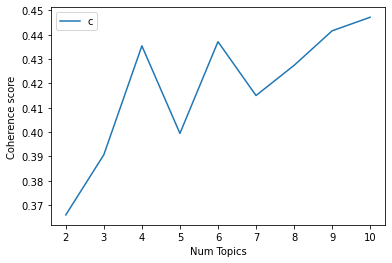

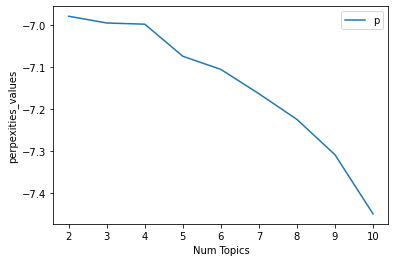

In [94]:
# -*- coding: utf-8 -*-
from konlpy.tag import Mecab
from tqdm import tqdm
import re
from gensim.models.ldamodel import LdaModel
from gensim.models.callbacks import CoherenceMetric
from gensim import corpora
from gensim.models.callbacks import PerplexityMetric
import logging
import pickle
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

coherence_values = []
perpexities_values = []
model_list = []


def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=1):
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        perpexities_values.append(model.log_perplexity(corpus))

    return model_list, coherence_values, perpexities_values


def find_optimal_number_of_topics(dictionary, corpus, processed_data):
    limit = 11;
    start = 2;
    step = 1;

    model_list, coherence_values, perpexities_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=processed_data, start=start, limit=limit, step=step)

    x = range(start, limit, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Num Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()
    
    x = range(start, limit, step)
    plt.plot(x, perpexities_values)
    plt.xlabel("Num Topics")
    plt.ylabel("perpexities_values")
    plt.legend(("perpexities_values"), loc='best')
    plt.show()

if __name__ == '__main__':
    
    print('Number of unique tokens: %d' % len(dictionary))
    print('Number of documents: %d' % len(corpus))

    logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

    #최적의 토픽 수 찾기
    find_optimal_number_of_topics(dictionary, corpus, processed_data)

In [95]:
j=0
for i in range(len(coherence_values)):
    print(j+2," coherence_value: ",coherence_values[i])
    print(j+2, " perpexities_values: ", perpexities_values[i])
    j+=1

2  coherence_value:  0.36595673890310976
2  perpexities_values:  -6.979932321994651
3  coherence_value:  0.39067855132469403
3  perpexities_values:  -6.995986815879427
4  coherence_value:  0.4353789994311273
4  perpexities_values:  -6.998752815276526
5  coherence_value:  0.39944246364223324
5  perpexities_values:  -7.074979828601476
6  coherence_value:  0.43710174699678567
6  perpexities_values:  -7.106120939293412
7  coherence_value:  0.41499296016766435
7  perpexities_values:  -7.163867377123119
8  coherence_value:  0.42737252398657954
8  perpexities_values:  -7.224877445476363
9  coherence_value:  0.4415648929071965
9  perpexities_values:  -7.308845984879248
10  coherence_value:  0.4471423979182651
10  perpexities_values:  -7.449129323673564


In [96]:
num_topics = 6

temp = dictionary[0]
id2word = dictionary.id2token

model = model_list[num_topics-2]

top_topics = model.top_topics(corpus) #, num_words=20)

# Average topic coherence is the sum of topic coherences of all topics, divided by the number of topics.
avg_topic_coherence = sum([t[1] for t in top_topics]) / num_topics
print('Average topic coherence: %.4f.' % avg_topic_coherence)

from pprint import pprint
pprint(top_topics)

2022-08-29 20:26:51,133 : INFO : CorpusAccumulator accumulated stats from 1000 documents
2022-08-29 20:26:51,138 : INFO : CorpusAccumulator accumulated stats from 2000 documents
2022-08-29 20:26:51,142 : INFO : CorpusAccumulator accumulated stats from 3000 documents
2022-08-29 20:26:51,145 : INFO : CorpusAccumulator accumulated stats from 4000 documents
2022-08-29 20:26:51,148 : INFO : CorpusAccumulator accumulated stats from 5000 documents
2022-08-29 20:26:51,150 : INFO : CorpusAccumulator accumulated stats from 6000 documents
2022-08-29 20:26:51,153 : INFO : CorpusAccumulator accumulated stats from 7000 documents
2022-08-29 20:26:51,156 : INFO : CorpusAccumulator accumulated stats from 8000 documents
2022-08-29 20:26:51,159 : INFO : CorpusAccumulator accumulated stats from 9000 documents
2022-08-29 20:26:51,162 : INFO : CorpusAccumulator accumulated stats from 10000 documents
2022-08-29 20:26:51,164 : INFO : CorpusAccumulator accumulated stats from 11000 documents
2022-08-29 20:26:51

Average topic coherence: -4.5156.
[([(0.09862637, '코인'),
   (0.07370024, '퀘스트'),
   (0.040008478, '옷'),
   (0.026777487, '광고'),
   (0.026276298, '게임'),
   (0.02493744, '젬'),
   (0.02088497, '옷장'),
   (0.01884676, '현질'),
   (0.01733466, '아이템'),
   (0.010990698, '선물'),
   (0.010472408, '점'),
   (0.009221738, '구매'),
   (0.008931415, '보상'),
   (0.0085698385, '스크래치'),
   (0.008435639, '하루'),
   (0.008284461, '렉'),
   (0.008198728, '돈'),
   (0.008077305, '방법'),
   (0.007824242, '오류'),
   (0.0073960572, '추가')],
  -2.893610005873231),
 ([(0.04122382, '사진'),
   (0.040158696, '로딩'),
   (0.036454093, '얼굴'),
   (0.030119976, '화면'),
   (0.02017438, '추가'),
   (0.019256825, '월드'),
   (0.019163303, '선물'),
   (0.018097062, '렉'),
   (0.017984876, '저장'),
   (0.017608704, '기능'),
   (0.017300535, '친구'),
   (0.016040888, '실행'),
   (0.012657642, '게임'),
   (0.012322758, '접속'),
   (0.01186085, '옷'),
   (0.011541623, '창'),
   (0.01034349, '시간'),
   (0.009817791, '오류'),
   (0.009806188, '터치'),
   (0.009790312, '

In [92]:
import pickle
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

In [93]:
lda_visualization = gensimvis.prepare(model, corpus, dictionary, sort_topics=False)
pyLDAvis.save_html(lda_visualization, 'output/zepeto_topic_modeling_topic6_0828.html')